# 예제
1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, tran_d_1, tran_d_2) 각각 변수에 로드
2. tran_1, tran_2 단순한 행 결합
3. tran_d_1, tran_d_2 단순한 행 결합
4. 2번의 결과와 3번의 결과를 특정 조건에 맞춰서 열 결합 (transaction 기준으로)

In [133]:
import pandas as pd

In [134]:
tran_1=pd.read_csv('../csv/tran_1.csv')
tran_2=pd.read_csv('../csv/tran_2.csv')
tran_d_1=pd.read_csv('../csv/tran_d_1.csv')
tran_d_2=pd.read_csv('../csv/tran_d_2.csv')

In [135]:
pd.concat([tran_1, tran_2], axis='rows')

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [136]:
pd.concat([tran_d_1,tran_d_2], axis=0)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


In [137]:
tran_3 = pd.concat([tran_1, tran_2], axis='rows')
tran_d_3 = pd.concat([tran_d_1,tran_d_2], axis=0)

In [138]:
transaction = pd.merge(tran_3,tran_d_3, on='transaction_id', how='left')

# 데이터결합2
1. customer_master, item_master 파일 두 개 로드
2. 1번 과정에서 불러온 2개의 데이터를 transaction 데이터프레임에 조건에 맞게 조인 결합
3. 결합이 된 데이터에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 라는 파생변수를 생성
4. payment_date 컬럼을 시계열 데이터로 변경

In [139]:
customer=pd.read_csv('../csv/customer_master.csv')
item=pd.read_csv('../csv/item_master.csv')

In [140]:
customer.head(1)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [141]:
item.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [142]:
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [143]:
tran_cus=pd.merge(customer, transaction, on='customer_id', how='right')
tran_item=pd.merge(item, tran_cus, on='item_id', how='right')

In [144]:
tran_item.head(1)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1


In [145]:
tran_item['total_price'] = tran_item['item_price']*tran_item['quantity']

In [146]:
tran_item.head(1)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000


In [147]:
tran_item['payment_date']=pd.to_datetime(tran_item['payment_date'])

In [148]:
tran_item.head()

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000
1,S001,PC-A,50000,HD678019,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,T0000000114,50000,2019-02-01 01:37:23,1,1,50000
2,S003,PC-C,120000,HD298120,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,T0000000115,120000,2019-02-01 02:34:19,2,1,120000
3,S005,PC-E,210000,IK452215,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,T0000000116,210000,2019-02-01 02:47:23,3,1,210000
4,S002,PC-B,85000,PL542865,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,T0000000117,170000,2019-02-01 04:33:46,4,2,170000


In [149]:
tran_item.loc[tran_item['quantity'] > 2] 

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price
21,S001,PC-A,50000,TS701801,XXXX,C01,F,2018-08-11 00:00:00,2018-12-31 00:00:00,CA1,1.0,T0000000134,150000,2019-02-01 22:08:51,21,3,150000
27,S001,PC-A,50000,IK548249,XXX,C03,M,2018-06-02 00:00:00,2019-03-31 00:00:00,CA2,1.0,T0000000140,150000,2019-02-02 00:17:54,27,3,150000
51,S001,PC-A,50000,AS820169,XXX,C01,M,2018-06-09 00:00:00,2018-09-30 00:00:00,CA2,1.0,T0000000164,150000,2019-02-02 20:20:39,51,3,150000
57,S001,PC-A,50000,TS918434,XXXX,C02,F,2018-08-07 00:00:00,2018-09-30 00:00:00,CA1,1.0,T0000000170,150000,2019-02-03 00:46:24,57,3,150000
128,S001,PC-A,50000,AS700935,XX,C01,F,2017-08-01 00:00:00,NaN,CA2,0.0,T0000000236,150000,2019-02-04 20:56:36,128,3,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,S001,PC-A,50000,IK528327,XXX,C01,F,2018-04-01 00:00:00,2018-11-30 00:00:00,CA3,1.0,T0000006842,150000,2019-07-30 13:09:03,7085,3,150000
7092,S002,PC-B,85000,AS366153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T0000006849,255000,2019-07-30 15:21:57,7092,3,255000
7109,S001,PC-A,50000,PL900188,XX,C03,F,2016-01-01 00:00:00,NaN,CA1,0.0,T0000006865,150000,2019-07-31 03:46:50,7109,3,150000
7114,S001,PC-A,50000,HD880785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T0000006870,150000,2019-07-31 05:53:32,7114,3,150000


In [150]:
tran_item.loc[tran_item['price'] !=tran_item['total_price']] 

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price
81,S002,PC-B,85000,HD699115,XXXXX,C01,F,2017-04-01 00:00:00,2019-02-28 00:00:00,CA1,1.0,T0000000194,295000,2019-02-03 18:03:07,81,1,85000
82,S005,PC-E,210000,HD699115,XXXXX,C01,F,2017-04-01 00:00:00,2019-02-28 00:00:00,CA1,1.0,T0000000194,295000,2019-02-03 18:03:07,82,1,210000
96,S003,PC-C,120000,AS359364,XX,C03,F,2015-10-01 00:00:00,NaN,CA1,0.0,T0000000208,170000,2019-02-04 00:53:35,96,1,120000
97,S001,PC-A,50000,AS359364,XX,C03,F,2015-10-01 00:00:00,NaN,CA1,0.0,T0000000208,170000,2019-02-04 00:53:35,97,1,50000
108,S003,PC-C,120000,HD819739,XX,C01,M,2017-07-01 00:00:00,2019-02-28 00:00:00,CA2,1.0,T0000000219,205000,2019-02-04 09:20:01,108,1,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,S003,PC-C,120000,GD862018,XXXX,C02,F,2017-06-01 00:00:00,2018-06-30 00:00:00,CA1,1.0,T0000006829,330000,2019-07-30 07:26:30,7072,1,120000
7107,S001,PC-A,50000,IK341016,XXX,C01,M,2017-03-01 00:00:00,2018-04-30 00:00:00,CA1,1.0,T0000006864,100000,2019-07-31 03:42:20,7107,1,50000
7108,S001,PC-A,50000,IK341016,XXX,C01,M,2017-03-01 00:00:00,2018-04-30 00:00:00,CA1,1.0,T0000006864,100000,2019-07-31 03:42:20,7108,1,50000
7128,S001,PC-A,50000,PL491769,XXXX,C03,F,2018-09-14 00:00:00,2018-10-31 00:00:00,CA1,1.0,T0000006884,260000,2019-07-31 18:12:37,7128,1,50000


In [151]:
# 시계열데이터를 이용하는 예제
# 시계열데이터애서 년, 월 추출해서 새로운 파생변수 생성
# payment_month 컬럼을 생성
tran_item['payment_month']=tran_item['payment_date'].dt.strftime('%Y-%m')



In [152]:
tran_item.head(1)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price,payment_month
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000,2019-02


# 그룹화, 시각화 예제
1. payment_month 컬럼 기준으로 그룹화
2. total_price의 합계, price의 합계를 라인 그래프로 시각화
3. subplot 이용하여 2개의 그래프 출력

In [153]:
# 그룹화 -> groupby
group_data=tran_item.groupby(['payment_month']).sum()

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_38300\3516582423.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data=tran_item.groupby(['payment_month']).sum()


In [1]:
import matplotlib.pyplot as plt

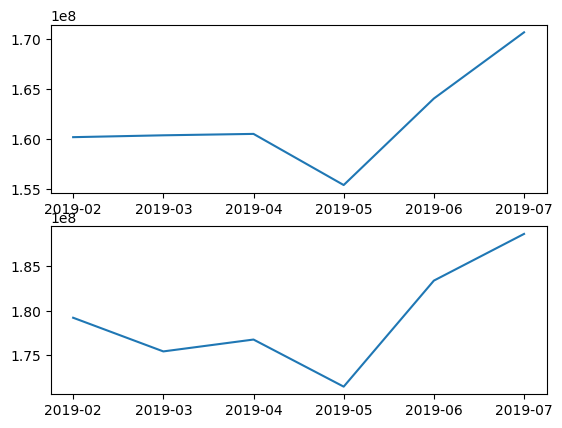

In [155]:
plt.subplot(2,1,1)
plt.plot(group_data['total_price'])
plt.subplot(2,1,2)
plt.plot(group_data['price'])
plt.show()


In [156]:
tran_item.head(2)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price,payment_month
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000,2019-02
1,S001,PC-A,50000,HD678019,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,T0000000114,50000,2019-02-01 01:37:23,1,1,50000,2019-02


In [157]:
# apply() 함수를 이용하여 gender 컬럼의 데이터를 M -> 남, F -> 여, NaN -> 무응답 으로 변경
def change(x):
    if x=='F':
        #print('여', end=' ')
        return '남'
    elif x=='M':
        #print('남', end=' ')
        return '여'
    else:
        #print('무응답', end=' ')
        return '무응답'
    

# apply() 함수에서 change 함수 호출 횟수 -> tran_item['gender'] 값의 길이
# 데이터의 값을 change 함수에 x라는 매개변수에 value 값을 담아서 실행
# 첫번째 함수가 실행이 됐을때 x의 값은 M
    

#tran_item['gender']=tran_item['gender'].apply(change)

In [158]:
tran_item.head(2)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price,payment_month
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000,2019-02
1,S001,PC-A,50000,HD678019,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,T0000000114,50000,2019-02-01 01:37:23,1,1,50000,2019-02


In [159]:
tran_item

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price,payment_month
0,S005,PC-E,210000,PL563502,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000,2019-02
1,S001,PC-A,50000,HD678019,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,T0000000114,50000,2019-02-01 01:37:23,1,1,50000,2019-02
2,S003,PC-C,120000,HD298120,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,T0000000115,120000,2019-02-01 02:34:19,2,1,120000,2019-02
3,S005,PC-E,210000,IK452215,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,T0000000116,210000,2019-02-01 02:47:23,3,1,210000,2019-02
4,S002,PC-B,85000,PL542865,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,T0000000117,170000,2019-02-01 04:33:46,4,2,170000,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,S004,PC-D,180000,HI400734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T0000006894,180000,2019-07-31 21:20:44,7139,1,180000,2019-07
7140,S002,PC-B,85000,AS339451,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,T0000006895,85000,2019-07-31 21:52:48,7140,1,85000,2019-07
7141,S001,PC-A,50000,OA027325,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,T0000006896,100000,2019-07-31 23:35:25,7141,2,100000,2019-07
7142,S002,PC-B,85000,TS624738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T0000006897,85000,2019-07-31 23:39:35,7142,1,85000,2019-07


In [161]:
# apply(), lambda() 같이 사용하는 방법

tran_item['gender']=tran_item['gender'].apply(lambda x : '여' if x=='F'else ('남' if x=='M' else '무응답'))

In [162]:
tran_item.head(2)

,item_id,item_name,item_price,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,transaction_id,price,payment_date,detail_id,quantity,total_price,payment_month
0,S005,PC-E,210000,PL563502,XX,C01,남,2018-07-01 00:00:00,NaN,CA1,0.0,T0000000113,210000,2019-02-01 01:36:57,0,1,210000,2019-02
1,S001,PC-A,50000,HD678019,XXXXX,C01,남,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,T0000000114,50000,2019-02-01 01:37:23,1,1,50000,2019-02
